In [25]:
library(tidyverse)
library(ggplot2)
library(stringr)

# Bitcoin

Hier werden alle Daten Bitcoins zusammengefügt

## News

### Sentiment

In [26]:
btc_news_sentiment = read.csv2("./Data/NewsSentiment/Sentinment_Bitcoin.csv", sep=";")
head(btc_news_sentiment)

headline                                                                    
1 Why spot bitcoin ETFs are unlikely to entice banks toward crypto            
2 Many trading apps embrace bitcoin ETFs, some still crypto shy               
3 SEC approved spot bitcoin ETFs. What happens now?                           
4 Spot bitcoin ETFs are coming, but not as soon as their advocates think      
5 Bankers design a new blockchain that works like bitcoin — but it's regulated
6 Custodia Bank launches bitcoin custody platform                             
  description                                                                                                                                                                                             
1 Comments from SEC Chair Gary Gensler and market fundamentals have created ample reason for banks to stay away from crypto, despite early bird upsides.                                                  
2 Robinhood and a few other trading app providers immediately announced support for the newly approved spot bitcoin ETFs. But Vanguard announced this week it would not allow customers to invest in them.
3 The decision could make bitcoin a major part of more investing portfolios. But after bitcoin, the SEC is likely to move slowly on approving other crypto-tied ETFs.                                     
4 Before a spot bitcoin ETF is approved, we're going to need to see much more clarity about how applicants draw the line between custody and trading.                                                     
5 A blueprint for a shared ledger for digital money would include central bank digital currencies, bank deposits and e-money from companies like PayPal — but not unsupervised cryptocurrencies.          
6 The Wyoming bank has launched its signature service, amid a legal tug-of-war with the Federal Reserve.                                                                                                  
  url                    date       sentiment.positive sentiment.negative
1 www.americanbanker.com 2024-01-22 0.42               0.26              
2 www.americanbanker.com 2024-01-12 0.50               0.33              
3 www.americanbanker.com 2024-01-11 0.56               0.29              
4 www.americanbanker.com 2024-01-01 0.62               0.26              
5 www.americanbanker.com 2022-11-28 0.58               0.19              
6 www.americanbanker.com 2023-11-10 0.41               0.39              
  sentiment.neutral
1 0.32             
2 0.17             
3 0.15             
4 0.12             
5 0.23             
6 0.20

In [27]:
btc_news_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())%>%
    head()

sentiment menge
1 neg       2031 
2 pos       4910

`summarise()` has grouped output by 'sentiment'. You can override using the
`.groups` argument.


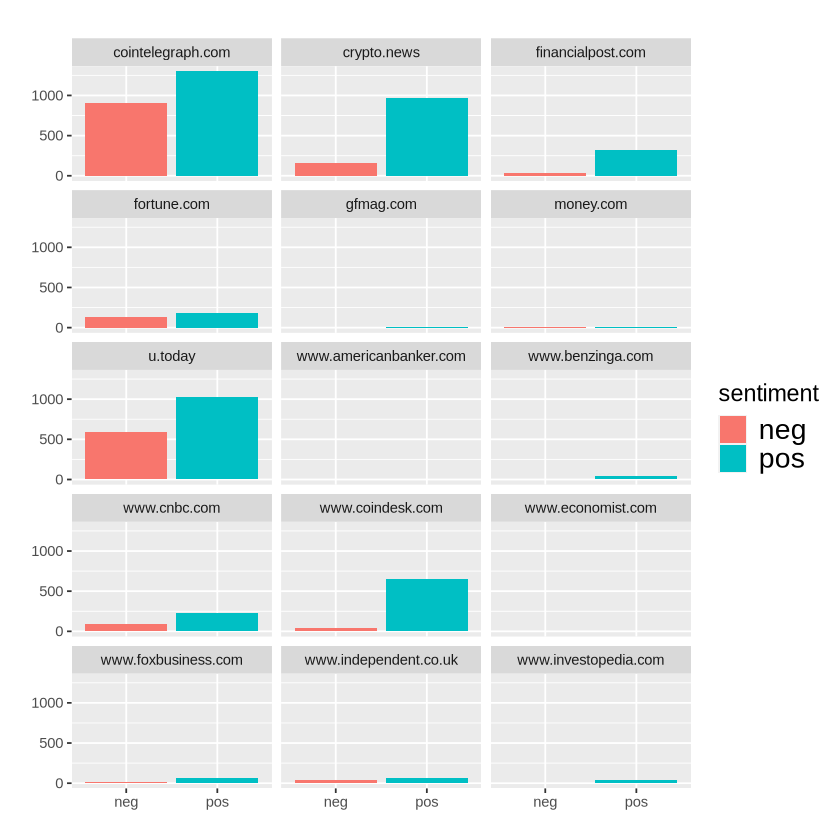

In [48]:
btc_news_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment, url) %>%
    summarise(menge = n())%>%
    ggplot(aes(x = sentiment, y = menge)) +
    geom_bar(stat = "identity", aes(fill= sentiment)) +
    facet_wrap(~url, ncol = 3) +
    labs(title="",x ="", y = "")+theme(legend.title = element_text(size = 14),legend.text = element_text(size = 17))

In [29]:
btc_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(sentiment = mean(sentiment)) -> btc_news_sentiment_w

`summarise()` has grouped output by 'week', 'url'. You can override using the
`.groups` argument.


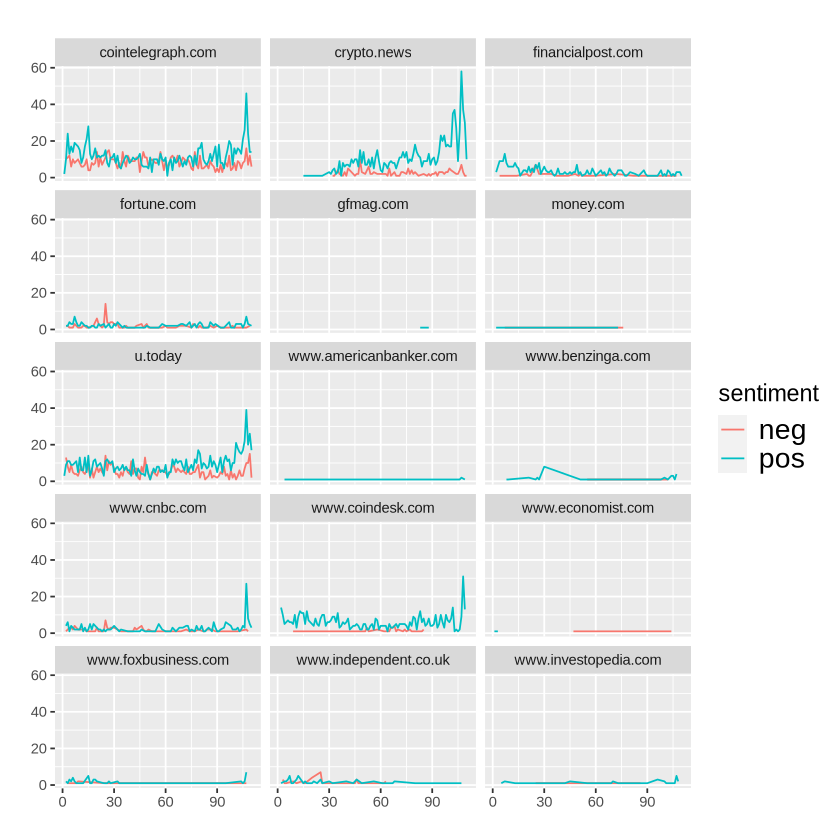

In [49]:
btc_news_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    mutate(date = as.Date(date)) %>%
    mutate(week = cut.Date(date, breaks = "1 week", labels = FALSE)) %>%
    group_by(week, url, sentiment) %>%
    summarise(menge = n())%>%
    ggplot(aes(x = week, y = menge)) + geom_line(aes(color=sentiment)) + facet_wrap(~url, ncol = 3)+
    labs(title="",x ="", y = "")+theme(legend.title = element_text(size = 14),legend.text = element_text(size = 17))

In [31]:
btc_news_sentiment_w %>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())%>%
    head()

sentiment menge
1 neg         2  
2 pos       108

In [32]:
btc_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(date) %>%
    summarise(sentiment = mean(sentiment)) -> btc_news_sentiment_d

In [33]:
btc_news_sentiment_d %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    group_by(sentiment) %>%
    summarise(menge = n())

sentiment menge
1 neg        82  
2 pos       667

### Menge

In [34]:
btc_news_sentiment %>%
    mutate(date = as.Date(date)) %>%
    group_by(week = cut(date, "week")) %>%
    summarise(menge = n()) -> btc_news_menge_w

## Comments

### Sentiment

In [35]:
btc_comment_sentiment = read.csv2("./Data/CommentsSentiment/Sentinment_Bitcoin.csv", sep=";")
head(btc_comment_sentiment)

headline                                                                                                                                                                                                                                                      
1 Btc 35 k buy ytd                                                                                                                                                                                                                                              
2 I’ve been watching tech trend trades giving his analysis throughout yesterday - man has been right. What’s your prediction for a realistic high at the moment?                                                                                                
3 Investing is the greatest thing in my life, investing has saved me from Dept and also helping me to pay my bills, I got my profit into my wallet by the good guidelines of this trustworthy man thank you sir for always putting smiles on my face... his WsAP
4 Asian markets effect in 1-3hrs let's see what happens next                                                                                                                                                                                                    
5 One of the best Forex Trade exchanges with the Best investment trading for Beginners and Pros. Start with 100 dollar and receive 1500 dollar  within short period.                                                                                            
6 Way too high yo’s. Dump dis.                                                                                                                                                                                                                                  
  date       sentiment.positive sentiment.negative sentiment.neutral
1 2024-03-17 0                  0                  1                
2 2024-03-17 1                  0                  0                
3 2024-03-17 1                  0                  0                
4 2024-03-17 0                  0                  1                
5 2024-03-17 1                  0                  0                
6 2024-03-17 0                  1                  0

In [36]:
btc_comment_sentiment %>%
    mutate(date = as.Date(date)) %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(sentiment = mean(sentiment)) -> btc_comment_sentiment_w
    

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


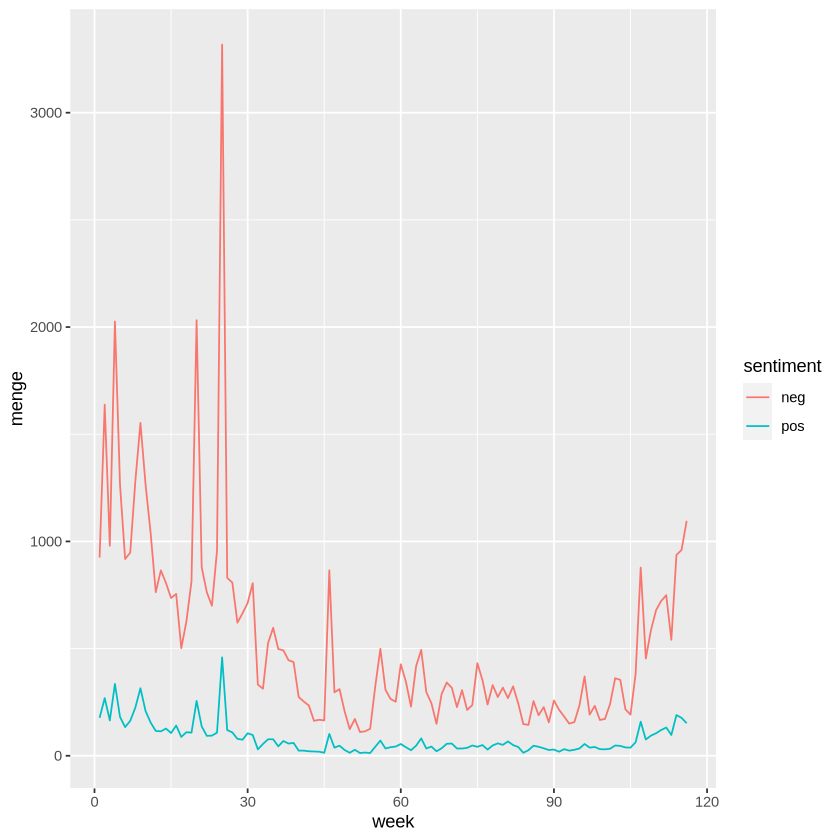

In [37]:
btc_comment_sentiment %>%
    mutate(sentiment = sentiment.positive - sentiment.negative)%>%
    mutate(sentiment = ifelse(sentiment>0,"pos","neg"))%>%
    mutate(date = as.Date(date)) %>%
    mutate(week = cut.Date(date, breaks = "1 week", labels = FALSE)) %>%
    group_by(week, sentiment) %>%
    summarise(menge = n())%>%
    ggplot(aes(x = week, y = menge)) + geom_line(aes(color=sentiment))

### Menge

In [38]:
btc_comment_sentiment %>%
    mutate(date = as.Date(date)) %>%
    group_by(week = cut(date, "week")) %>%
    summarise(menge = n()) -> btc_comment_menge_w

## Google Trends

In [39]:
btc_trends = read.csv2("./Data/GoogleTrends/bitcoinTrends.csv", sep=",")
head(btc_trends)

Woche      Bitcoin
1 2019-03-17  9     
2 2019-03-24  9     
3 2019-03-31 16     
4 2019-04-07 13     
5 2019-04-14 11     
6 2019-04-21 11

In [40]:
btc_trends %>%
    mutate(date = as.Date(Woche)) %>%
    filter(date >= "2021-01-01") %>%
    filter(date <= "2024-02-01") %>%
    mutate(trend = Bitcoin / 100)%>%
    group_by(week = cut(date, "week")) %>%
    summarise(trend = mean(trend)) -> btc_trends_w

## Bitcoin Preis

In [41]:
coin_history = read.csv2("./Data/coin_history.csv")
head(coin_history)

X coin    date         value        type      
1 1 Bitcoin 1.613693e+12 9.639114e+11 market_cap
2 2 Bitcoin 1.613779e+12 1.044190e+12 market_cap
3 3 Bitcoin 1.613866e+12 1.050556e+12 market_cap
4 4 Bitcoin 1.613952e+12 1.075380e+12 market_cap
5 5 Bitcoin 1.614038e+12 1.012092e+12 market_cap
6 6 Bitcoin 1.614125e+12 9.041338e+11 market_cap

In [42]:
coin_history %>%
    mutate(date = as.Date(as.POSIXct(date/ 1000, origin="1970-01-01"))) %>%
    filter(type == "prices") %>% 
    filter(date >= "2021-12-01") %>%
    filter(date <= "2024-02-01") %>%
    filter(coin == "Bitcoin")%>%
    group_by(week = cut(date, "week")) %>%
    summarise(open = first(value), close = last(value)) %>%
    mutate(return.p = log((1+(close - lag(close)) / lag(close))))%>%
    mutate(return = close - lag(close)) %>%
    mutate(week = as.Date(week)) %>%
    filter(week >= "2021-12-27") -> bitcoin_history_w

In [43]:
bitcoin = merge(x=bitcoin_history_w, y=btc_news_sentiment_w, dy="week")
bitcoin = bitcoin %>% mutate(news_sentiment = sentiment) %>% select(-sentiment)
bitcoin = merge(x=bitcoin, y=btc_comment_sentiment_w, dy="week")
bitcoin = bitcoin %>% mutate(sm_sentiment = sentiment) %>% select(-sentiment)
bitcoin = merge(x=bitcoin, y=btc_trends_w, dy="week")
bitcoin = merge(x=bitcoin, y=btc_news_menge_w, dy="week")
bitcoin = bitcoin %>% mutate(news_menge = menge) %>% select(-menge)
bitcoin = merge(x=bitcoin, y=btc_comment_menge_w, dy="week")
bitcoin = bitcoin %>% mutate(sm_menge = menge) %>% select(-menge)

head(bitcoin)

week       open     close    return.p    return    news_sentiment
1 2021-12-27 50852.86 47816.08 -0.05784354 -2847.409 0.20666667    
2 2022-01-03 47387.21 41756.66 -0.13550292 -6059.415 0.08041667    
3 2022-01-10 41862.36 43226.65  0.03459819  1469.988 0.16662921    
4 2022-01-17 43119.79 35180.44 -0.20596709 -8046.215 0.10611111    
5 2022-01-24 36306.41 38232.18  0.08318742  3051.743 0.16123288    
6 2022-01-31 37983.15 41493.69  0.08186383  3261.511 0.17942857    
  sm_sentiment trend news_menge sm_menge
1 -0.06350272  0.40   6         1102    
2 -0.09464080  0.39  72         1907    
3 -0.08801747  0.40  89         1145    
4 -0.11952562  0.52  72         2361    
5 -0.10912742  0.37  73         1444    
6 -0.09342205  0.37  70         1052

In [45]:
#write.csv2(bitcoin,"./Data/CoinTables/bitcoinDaten.csv", row.names = FALSE)